Insurance Forecast by using Regression Algorithms
Predict : Charges  Can you accurately predict insurance costs?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("medical_cost_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
ohe=OneHotEncoder()
x=df[["region","sex","smoker"]].values
x=ohe.fit_transform(x).toarray()
y=z=np.hstack(ohe.categories_)
merge= pd.DataFrame(data=x,columns=y)
df_n=pd.concat([df,merge],axis=1)
df_n

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest,female,male,no,yes
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [5]:
df_n.drop(columns=["region","northeast","smoker","sex","female","no"], inplace=True)
df_n.rename(columns={"yes":"smoker"},inplace=True)
df_n

,age,bmi,children,charges,northwest,southeast,southwest,male,smoker
0,19,27.900,0,16884.92400,0.0,0.0,1.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,1.0,0.0,0.0,1.0,0.0
4,32,28.880,0,3866.85520,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1.0,0.0,0.0,1.0,0.0
1334,18,31.920,0,2205.98080,0.0,0.0,0.0,0.0,0.0
1335,18,36.850,0,1629.83350,0.0,1.0,0.0,0.0,0.0
1336,21,25.800,0,2007.94500,0.0,0.0,1.0,0.0,0.0


In [9]:
df_n.dtypes

age            int64
bmi          float64
children       int64
charges      float64
northwest    float64
southeast    float64
southwest    float64
male         float64
smoker       float64
dtype: object

In [10]:
df_n.isnull().sum()

age          0
bmi          0
children     0
charges      0
northwest    0
southeast    0
southwest    0
male         0
smoker       0
dtype: int64

In [13]:
# removing outliers
z=np.abs(zscore(df_n))
dfn=df_n[(z<3).all(axis=1)]

In [15]:
dfn

,age,bmi,children,charges,northwest,southeast,southwest,male,smoker
0,19,27.900,0,16884.92400,0.0,0.0,1.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,1.0,0.0,0.0,1.0,0.0
4,32,28.880,0,3866.85520,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1.0,0.0,0.0,1.0,0.0
1334,18,31.920,0,2205.98080,0.0,0.0,0.0,0.0,0.0
1335,18,36.850,0,1629.83350,0.0,1.0,0.0,0.0,0.0
1336,21,25.800,0,2007.94500,0.0,0.0,1.0,0.0,0.0


Less than 10% data has been removed as outliers.

<AxesSubplot:>

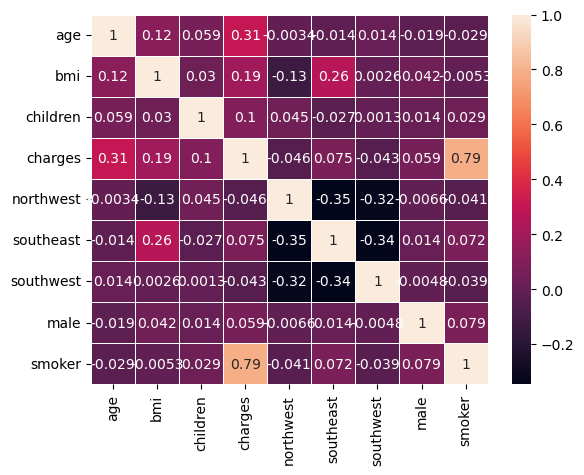

In [17]:
#to check multicolinearity

dfc=dfn.corr()
sns.heatmap(dfc, annot= True, linewidths=0.5)

No multicolinarity found

In [18]:
df_n.describe()

,age,bmi,children,charges,northwest,southeast,southwest,male,smoker
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.242900,0.272048,0.242900,0.505232,0.204783
std,14.049960,6.098187,1.205493,12110.011237,0.428995,0.445181,0.428995,0.500160,0.403694
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,0.000000,1.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
df_n.skew()

age          0.055673
bmi          0.284047
children     0.938380
charges      1.515880
northwest    1.200409
southeast    1.025621
southwest    1.200409
male        -0.020951
smoker       1.464766
dtype: float64

In [20]:
dfny=dfn["charges"]
dfny

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1309, dtype: float64

In [22]:
dfnx=dfn.drop(["charges"],axis=1)
dfnx

,age,bmi,children,northwest,southeast,southwest,male,smoker
0,19,27.900,0,0.0,0.0,1.0,0.0,1.0
1,18,33.770,1,0.0,1.0,0.0,1.0,0.0
2,28,33.000,3,0.0,1.0,0.0,1.0,0.0
3,33,22.705,0,1.0,0.0,0.0,1.0,0.0
4,32,28.880,0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1.0,0.0,0.0,1.0,0.0
1334,18,31.920,0,0.0,0.0,0.0,0.0,0.0
1335,18,36.850,0,0.0,1.0,0.0,0.0,0.0
1336,21,25.800,0,0.0,0.0,1.0,0.0,0.0


In [78]:
x_train,x_test,y_train,y_test=train_test_split(dfnx,dfny,test_size=0.4,random_state=18)

In [79]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.coef_

array([  255.24769554,   287.03380076,   630.35338753,  -206.74988434,
       -1139.71877457,  -392.3146001 ,  -287.91627654, 24603.78520593])

In [80]:
lr.intercept_
lr.score(x_train,y_train)

0.7636232174600898

In [81]:
pred=lr.predict(x_test)
print(r2_score(y_test,pred))
np.sqrt(mean_squared_error(y_test,pred))

0.7246875514879105


6038.027918873355

In [82]:
lr.score(x_train,y_train)

0.7636232174600898

In [83]:
rfr=RandomForestRegressor(random_state=22)
rfr.fit(x_train,y_train)
pr=rfr.predict(x_test)

In [84]:
rfr.score(x_train,y_train)

0.9747135338528123

In [90]:
inp=np.array([19,27.900,0,0.0,0.0,1.0,0.0,1.0])

In [91]:
i=inp.reshape(1,-1)

In [92]:
rfr.predict(i)

array([17116.5753378])